In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd

from sklearn.cluster import KMeans
from math import sin, cos, sqrt, atan2, radians
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(5)

In [2]:
df = pd.read_pickle('boosted_dataset.pkl')

In [3]:
def haversine_to_downtown(point):
    # calculates the distance between two points (lat, lngs) on a great circle, or on the 
    # surface of a sphere (in this case the sphere is planet earth)
    # units in km
    lat, lng = point
    deglen = 110.25
    x = lat - 30.2648
    y = (lng - (-97.7472))*cos(-97.7472)
    return deglen*sqrt(x*x + y*y)

In [20]:
def two_point_haversine(point1, point2):
    lat1, lng1 = point1
    lat2, lng2 = point2
    deglen = 110.25
    x = lat1 - lat2
    y = (lng1 - (lng2))*cos(lng2)
    return deglen*sqrt(x*x + y*y)

In [4]:
# get list of coordinates
subset = df[['lat', 'lon']]
tuples = [tuple(x) for x in subset.values]

In [21]:
len(tuples)

140386

In [5]:
distances = [haversine_to_downtown(coord) for coord in tuples]

In [6]:
df['dist_to_downtown'] = distances

In [7]:
X = df[['dist_to_downtown', 'price_per_sqft', 'bedrooms']].values

/Users/austinmadert/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


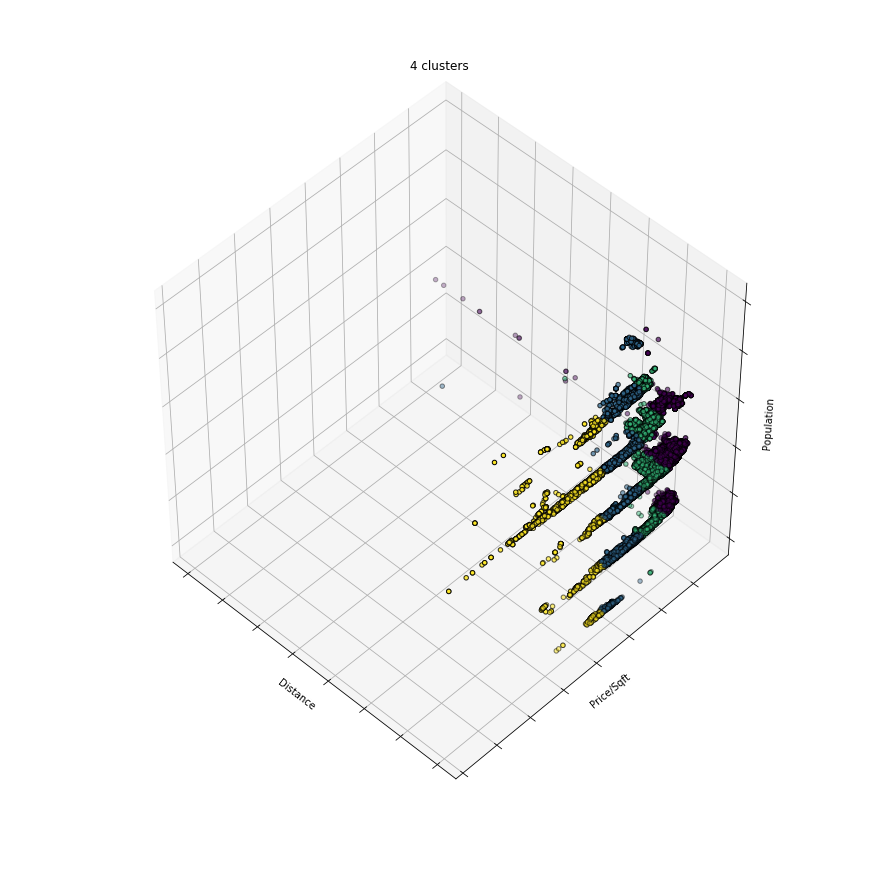

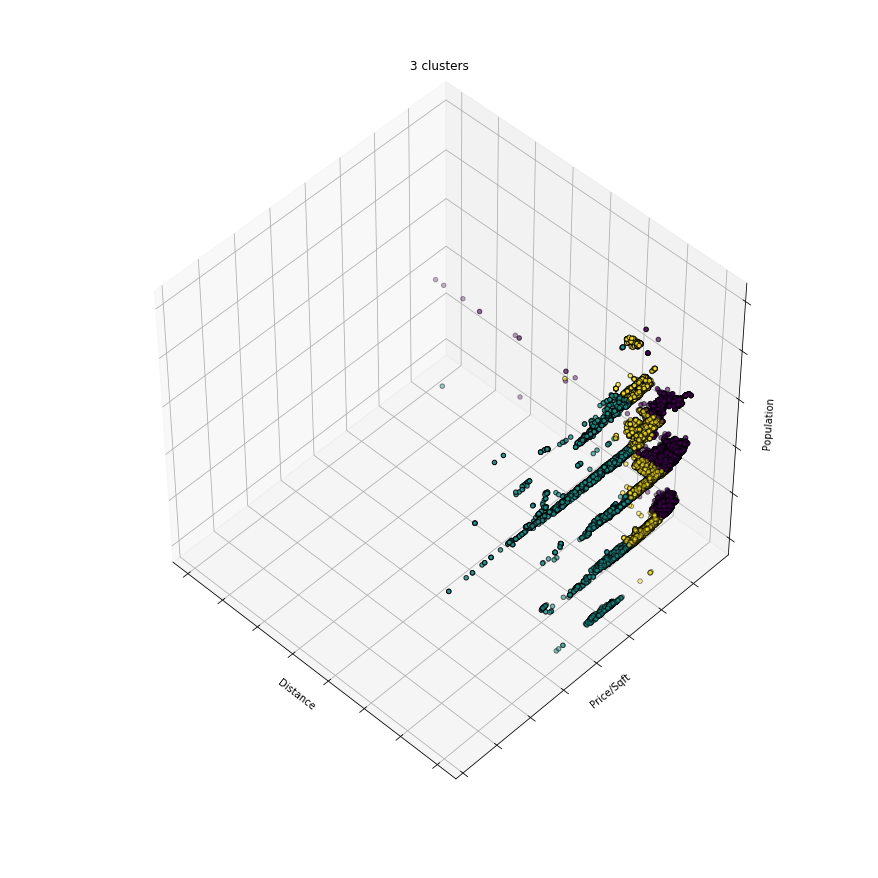

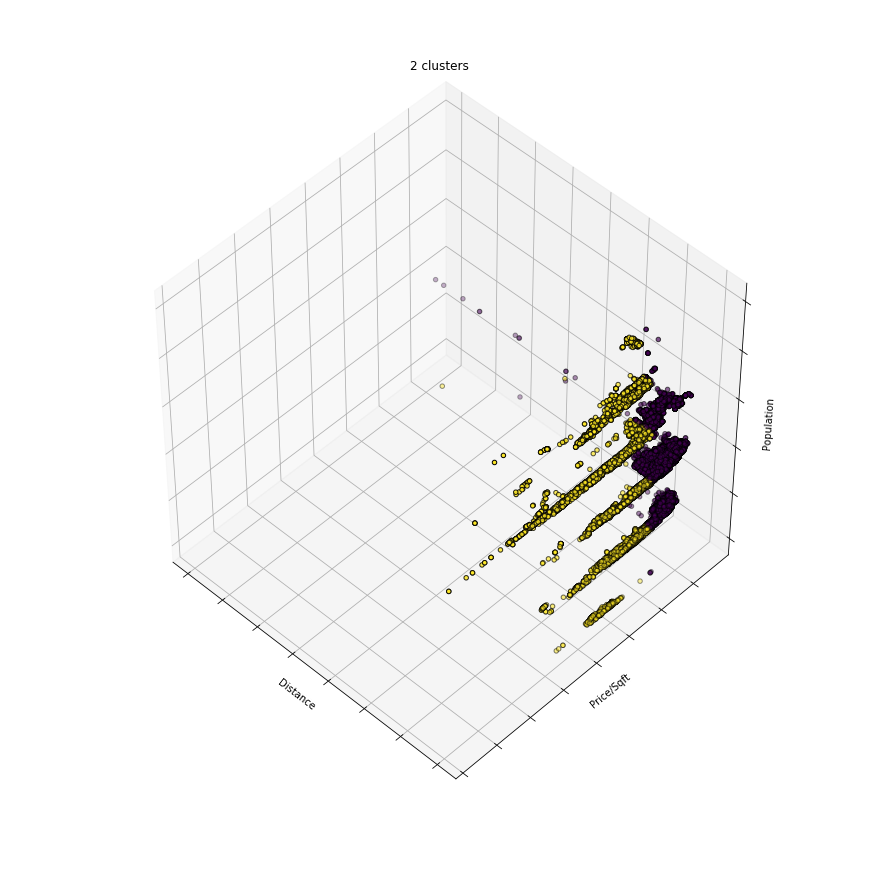

In [8]:
estimators = [('k_means_4', KMeans(n_clusters=4)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_2', KMeans(n_clusters=2))]

fignum = 1
titles = ['4 clusters', '3 clusters', '2 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(12, 12))
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 0], X[:, 1], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Distance')
    ax.set_ylabel('Price/Sqft')
    ax.set_zlabel('Population')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum += 1

fig.show()

In [9]:
df.head()

,c_street_number,c_street,c_unit,c_city,c_state,c_zip_code,g_county,lat,lon,adj_address,price_per_sqft,price_per_sqft_gboost,price,sqft,bathrooms,bedrooms,dist_to_downtown
1,12200,PRATOLINA DRIVE,None,AUSTIN,TX,78739,Travis County,30.186914,-97.928031,12200 PRATOLINA DRIVEAUSTIN TX 78739,155.697824,170.340419,445542.635209,2861.585492,3.348373,4,20.553532
3,15302,DOROTHY DRIVE,None,AUSTIN,TX,78734,Travis County,30.352751,-97.956798,15302 DOROTHY DRIVEAUSTIN TX 78734,175.621617,194.867737,609196.018461,3468.798588,3.773967,4,23.717263
4,2515,DREW LANE,None,AUSTIN,TX,78748,Travis County,30.169753,-97.833187,2515 DREW LANEAUSTIN TX 78748,173.795809,185.814928,569972.071712,3279.550145,3.689396,4,13.735147
5,15404,JOSEPH DRIVE,None,AUSTIN,TX,78734,Travis County,30.354369,-97.957800,15404 JOSEPH DRIVEAUSTIN TX 78734,175.513849,194.867737,605628.175255,3450.600493,3.766416,4,23.884909
7,11203,RANCH ROAD 2222,None,AUSTIN,TX,78730,Travis County,30.399156,-97.851646,11203 RANCH ROAD 2222AUSTIN TX 78730,250.800338,276.521308,763918.922418,3045.924616,3.250597,3,18.323480


In [10]:
df.drop('price_per_sqft_gboost', axis=1, inplace=True)

In [11]:
df['price_per_bed'] = df['price'] / df['bedrooms']

In [12]:
df.head()

,c_street_number,c_street,c_unit,c_city,c_state,c_zip_code,g_county,lat,lon,adj_address,price_per_sqft,price,sqft,bathrooms,bedrooms,dist_to_downtown,price_per_bed
1,12200,PRATOLINA DRIVE,None,AUSTIN,TX,78739,Travis County,30.186914,-97.928031,12200 PRATOLINA DRIVEAUSTIN TX 78739,155.697824,445542.635209,2861.585492,3.348373,4,20.553532,111385.658802
3,15302,DOROTHY DRIVE,None,AUSTIN,TX,78734,Travis County,30.352751,-97.956798,15302 DOROTHY DRIVEAUSTIN TX 78734,175.621617,609196.018461,3468.798588,3.773967,4,23.717263,152299.004615
4,2515,DREW LANE,None,AUSTIN,TX,78748,Travis County,30.169753,-97.833187,2515 DREW LANEAUSTIN TX 78748,173.795809,569972.071712,3279.550145,3.689396,4,13.735147,142493.017928
5,15404,JOSEPH DRIVE,None,AUSTIN,TX,78734,Travis County,30.354369,-97.957800,15404 JOSEPH DRIVEAUSTIN TX 78734,175.513849,605628.175255,3450.600493,3.766416,4,23.884909,151407.043814
7,11203,RANCH ROAD 2222,None,AUSTIN,TX,78730,Travis County,30.399156,-97.851646,11203 RANCH ROAD 2222AUSTIN TX 78730,250.800338,763918.922418,3045.924616,3.250597,3,18.323480,254639.640806


In [15]:
stops = gpd.read_file('data/Shapefiles_20-_20JANUARY_202018/Stops/Stops.shp')

In [17]:
subs = stops[['LATITUDE', 'LONGITUDE']]
tups = [tuple(x) for x in subs.values]

In [23]:
min_transport_dist = [min([two_point_haversine(stop, address) for stop in tups]) for address in tuples]

In [26]:
df['min_dist_to_transport'] = min_transport_dist

In [27]:
df.head()

,c_street_number,c_street,c_unit,c_city,c_state,c_zip_code,g_county,lat,lon,adj_address,price_per_sqft,price,sqft,bathrooms,bedrooms,dist_to_downtown,price_per_bed,min_dist_to_transport
1,12200,PRATOLINA DRIVE,None,AUSTIN,TX,78739,Travis County,30.186914,-97.928031,12200 PRATOLINA DRIVEAUSTIN TX 78739,155.697824,445542.635209,2861.585492,3.348373,4,20.553532,111385.658802,3.156990
3,15302,DOROTHY DRIVE,None,AUSTIN,TX,78734,Travis County,30.352751,-97.956798,15302 DOROTHY DRIVEAUSTIN TX 78734,175.621617,609196.018461,3468.798588,3.773967,4,23.717263,152299.004615,11.432891
4,2515,DREW LANE,None,AUSTIN,TX,78748,Travis County,30.169753,-97.833187,2515 DREW LANEAUSTIN TX 78748,173.795809,569972.071712,3279.550145,3.689396,4,13.735147,142493.017928,0.719679
5,15404,JOSEPH DRIVE,None,AUSTIN,TX,78734,Travis County,30.354369,-97.957800,15404 JOSEPH DRIVEAUSTIN TX 78734,175.513849,605628.175255,3450.600493,3.766416,4,23.884909,151407.043814,11.240021
7,11203,RANCH ROAD 2222,None,AUSTIN,TX,78730,Travis County,30.399156,-97.851646,11203 RANCH ROAD 2222AUSTIN TX 78730,250.800338,763918.922418,3045.924616,3.250597,3,18.323480,254639.640806,0.736829


In [28]:
df.to_pickle('out_from_cluster_into_geoplotting.pkl')